Customers DataFrame Columns:  Index(['CustomerID', 'CustomerName', 'Region', 'SignupDate'], dtype='object')
Transactions DataFrame Columns:  Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price'],
      dtype='object')

Merged DataFrame Columns:  Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price', 'CustomerName', 'Region',
       'SignupDate'],
      dtype='object')
Davies-Bouldin Index: 0.9050755125597796


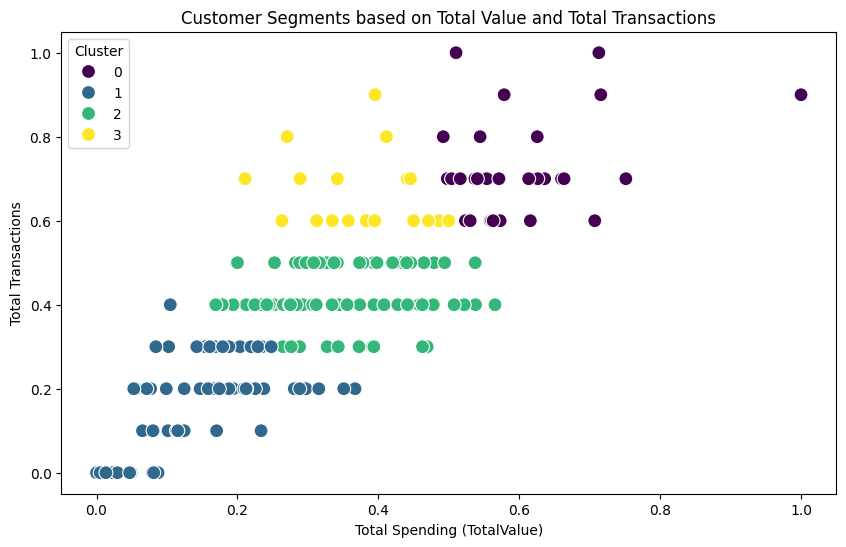


--- Clustered Customer Features ---
  CustomerID  TotalValue  TotalTransactions         Region  Cluster
0      C0001    0.308942                0.4  South America        2
1      C0002    0.168095                0.3           Asia        1
2      C0003    0.249541                0.3  South America        1
3      C0004    0.497806                0.7  South America        0
4      C0005    0.184287                0.2           Asia        1

Customer Segments saved to 'Customer_Segments.csv'.


In [10]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

customers_df = pd.read_csv("Customers.csv")
transactions_df = pd.read_csv("Transactions.csv")


print("Customers DataFrame Columns: ", customers_df.columns)
print("Transactions DataFrame Columns: ", transactions_df.columns)

merged_df = transactions_df.merge(customers_df, on="CustomerID", how="inner")


print("\nMerged DataFrame Columns: ", merged_df.columns)


customer_features = merged_df.groupby("CustomerID").agg({
    "TotalValue": "sum",
    "ProductID": "count",
}).reset_index()


customer_features.rename(columns={"ProductID": "TotalTransactions"}, inplace=True)

# Add region feature (you can also use signup date if needed)
customer_features["Region"] = merged_df.groupby("CustomerID")["Region"].first().values

# -------------------- Normalize numerical features --------------------
scaler = MinMaxScaler()
numerical_cols = ["TotalValue", "TotalTransactions"]
customer_features[numerical_cols] = scaler.fit_transform(customer_features[numerical_cols])

# -------------------- KMeans Clustering --------------------
# Perform KMeans clustering (choose number of clusters between 2 and 10)
num_clusters = 4  # You can try other values, e.g., 2-10 clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
customer_features['Cluster'] = kmeans.fit_predict(customer_features[numerical_cols])

# -------------------- Evaluate Clustering using Davies-Bouldin Index --------------------
db_index = davies_bouldin_score(customer_features[numerical_cols], customer_features['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")

# -------------------- Visualize Clusters --------------------
# Plot the clusters using a 2D scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=customer_features['TotalValue'], y=customer_features['TotalTransactions'], hue=customer_features['Cluster'], palette="viridis", s=100)
plt.title("Customer Segments based on Total Value and Total Transactions")
plt.xlabel("Total Spending (TotalValue)")
plt.ylabel("Total Transactions")
plt.show()

# -------------------- Output Final Clusters --------------------
# Save the customer features along with the cluster assignments
customer_features.to_csv("Customer_Segments.csv", index=False)

# -------------------- Print Clustered Data --------------------
print("\n--- Clustered Customer Features ---")
print(customer_features.head())

# Save the final dataset for later use (Customer Segments CSV)
print("\nCustomer Segments saved to 'Customer_Segments.csv'.")
